# Intro

This report will be about Delay metrics for our Airline, SouthWest. We will start out with a "State of the industry". This will involve historical trends in the industry as a whole as well of statistics of the current year. Then we will only focus on the top ten airports. We will then do a deep dive into our own numbers, predicting whether or not our planes will be delayed.


In [2]:
import pandas as pd 
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import matplotlib.gridspec as gridspec
import scipy as sp
import sqlite3

sns.set_style("dark")
%matplotlib inline 

In [5]:
conn = sqlite3.connect("/home/hakim/Documents/Southwest_Report/flight_data_historical/delayed.sqlite3")
df = pd.read_csv('/home/hakim/Documents/Southwest_Report/flight_data_historical/2008.csv')


In [6]:
conditionsArr = [(df['ArrDelay'] > 15)]
choicesArr = [1]
df['isDelArr'] = np.select(conditionsArr, choicesArr, default = 0)

conditionsDep = [(df['DepDelay'] > 15)]
choicesDep = [1]
df['isDelDep'] = np.select(conditionsDep, choicesDep, default = 0)

In [5]:
flightcount = pd.read_sql_query("select distinct Year ,count(Origin) as number_of_flights from delayed where Cancelled != 1 group by Year;", conn)
flightcount.set_index('Year', inplace = True)

# State of the Industry

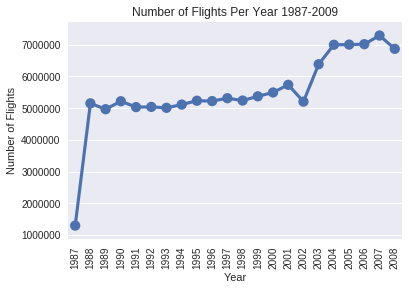

In [6]:
fc = sns.pointplot(x = flightcount.index, y = flightcount.number_of_flights)
fc.set_xticklabels(flightcount.index, rotation=90)
fc.set(xlabel='Year', ylabel='Number of Flights')
fc.set_title('Number of Flights Per Year 1987-2009');

In [10]:
can = pd.read_sql_query("select Year, sum(Cancelled) as Number_Cancelled from delayed group by year;", conn)
can.set_index('Year', inplace = True)

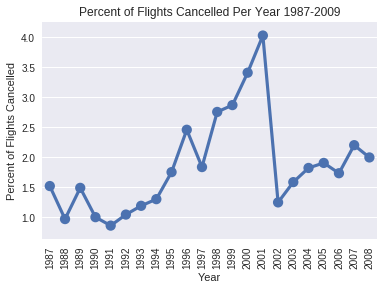

In [28]:
fcan = sns.pointplot(x = can.index, y = can.Number_Cancelled / flightcount.number_of_flights * 100)
fcan.set_xticklabels(can.index, rotation=90)
fcan.set(xlabel='Year', ylabel='Percent of Flights Cancelled')
fcan.set_title('Percent of Flights Cancelled Per Year 1987-2009');

In [29]:
flightsdiverted = pd.read_sql_query("select distinct Year ,sum(Diverted) as Diverted from delayed group by Year;", conn)
flightsdiverted.set_index('Year', inplace = True)

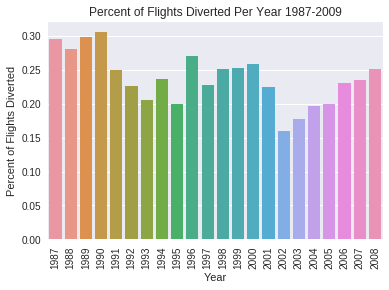

In [32]:
fdiv = sns.barplot(x = flightsdiverted.index, y = flightsdiverted.Diverted / flightcount.number_of_flights * 100)
fdiv.set_xticklabels(flightsdiverted.index, rotation=90)
fdiv.set(xlabel='Year', ylabel='Percent of Flights Diverted')
fdiv.set_title('Percent of Flights Diverted Per Year 1987-2009');

In [14]:
delayarr = pd.read_sql_query("select distinct year,avg(ArrDelay) as ArrDelay from delayed where ArrDelay group by Year;", conn)
delayarr.set_index('Year', inplace = True)

In [11]:
delayarrWN = pd.read_sql_query("select distinct year,avg(ArrDelay) as ArrDelay from delayed where UniqueCarrier='WN' group by Year;", conn)
delayarrWN.set_index('Year', inplace = True)

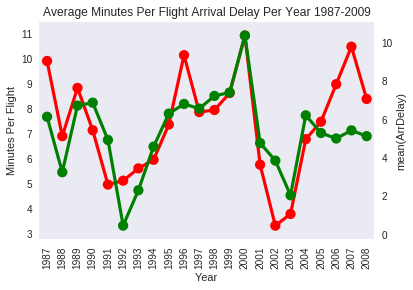

In [41]:
fig, ax = plt.subplots()
da = sns.pointplot(x = delayarr.index, y = delayarr.ArrDelay, ax=ax, color = 'red')
ax2 =ax.twinx()
sns.pointplot(x = delayarrWN.index,y = delayarrWN.ArrDelay, ax=ax2, color = 'green')
da.set_xticklabels(delayarr.index, rotation=90);
da.set(xlabel='Year', ylabel='Minutes Per Flight')
da.set_title('Average Minutes Per Flight Arrival Delay Per Year 1987-2009');

In [42]:
delaydep = pd.read_sql_query("select distinct year,avg(DepDelay) as Delay from delayed where DepDelay group by Year;", conn)
delaydep.set_index('Year', inplace = True)

In [35]:
delaydepWN = pd.read_sql_query("select distinct year,avg(DepDelay) as DepDelay from delayed where UniqueCarrier='WN' group by Year;", conn)
delaydepWN.set_index('Year', inplace = True)

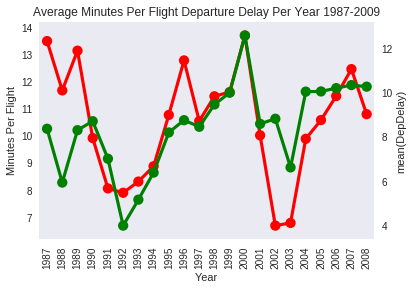

In [43]:
fig, ax = plt.subplots()
dd = sns.pointplot(x = delaydep.index, y = delaydep.Delay, ax = ax, color = 'red')
ax2 =ax.twinx()
dd.set_xticklabels(delaydep.index, rotation=90)
sns.pointplot(x = delaydepWN.index,y = delaydepWN.DepDelay, ax=ax2, color = 'green')
dd.set(xlabel='Year', ylabel='Minutes Per Flight')
dd.set_title('Average Minutes Per Flight Departure Delay Per Year 1987-2009');

In [33]:
delaytrendweather = pd.read_sql_query("select distinct year,sum(WeatherDelay) as weatherdelay from delayed group by year;", conn)
delaytrendweather.set_index('Year', inplace = True)

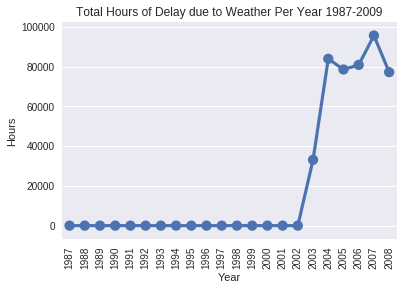

In [36]:
fdw = sns.pointplot(x = delaytrendweather.index, y = delaytrendweather.weatherdelay/60)
fdw.set_xticklabels(delaytrendweather.index, rotation=90)
fdw.set(xlabel='Year', ylabel='Hours')
fdw.set_title('Total Hours of Delay due to Weather Per Year 1987-2009');

In [46]:
delaytrendlateflight= pd.read_sql_query("select Year, sum(CarrierDelay) as delay from delayed group by Year;", conn)
delaytrendlateflight.set_index('Year', inplace=True)

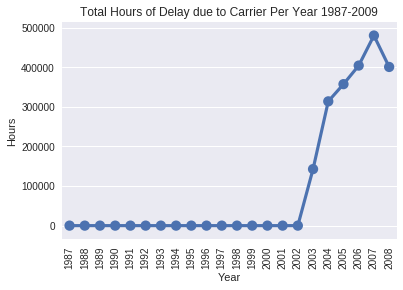

In [48]:
fdlf = sns.pointplot(x = delaytrendlateflight.index, y = delaytrendlateflight.delay/60)
fdlf.set_xticklabels(delaytrendlateflight.index, rotation=90)
fdlf.set(xlabel='Year', ylabel='Hours')
fdlf.set_title('Total Hours of Delay due to Carrier Per Year 1987-2009');

In [43]:
delaytrendsecurity = pd.read_sql_query("select Year, sum(SecurityDelay) as delay from delayed group by Year;", conn)
delaytrendsecurity .set_index('Year', inplace = True)

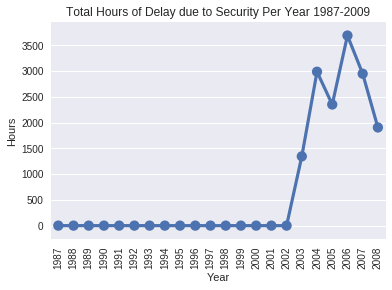

In [49]:
fds = sns.pointplot(x = delaytrendsecurity.index, y = delaytrendsecurity.delay/60)
fds.set_xticklabels(delaytrendsecurity.index, rotation=90)
fds.set(xlabel='Year', ylabel='Hours')
fds.set_title('Total Hours of Delay due to Security Per Year 1987-2009');

In [8]:
delarr = df[['isDelArr', 'isDelDep']].sum().to_frame()
delarr.columns = ['Count']

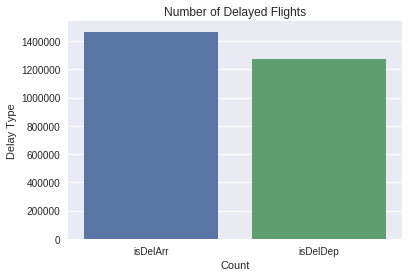

In [9]:
dela = sns.barplot(x = delarr.index , y = delarr.Count);
dela.set(xlabel='Count', ylabel='Delay Type')
dela.set_title('Number of Delayed Flights');

# Top 10 
Here we will start to look at the top 10. First we will see the top 10 airlines to see our competitors. Then we will look at the top 10 airports. After that we will filter that data to only include flights from the top 10 airports. Finally we will start the deep dive into our own numbers.

In [11]:
dfcar = pd.value_counts(df.UniqueCarrier, sort=True).to_frame().reset_index()
dfcar.columns = ['Carrier','Count']
topdfcar = dfcar.head(n=10)
topdfcar.set_index('Carrier',inplace = True)

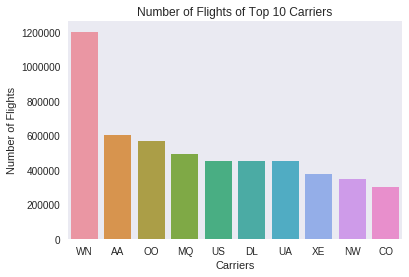

In [12]:
topcar = sns.barplot(x = topdfcar.index, y = topdfcar.Count)
topcar.set(xlabel='Carriers', ylabel='Number of Flights')
topcar.set_title('Number of Flights of Top 10 Carriers');

In [7]:
dforig = pd.value_counts(df.Origin, sort=True).to_frame().reset_index()
dforig.columns = ['Origin','Count']
topdforig = dforig.head(n=10)
topdforig.set_index('Origin',inplace = True)

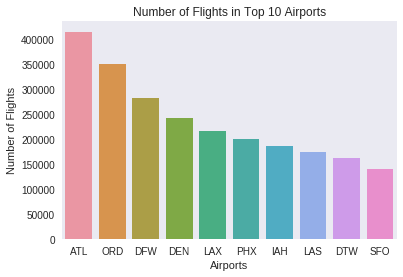

In [9]:
topair = sns.barplot(x = topdforig.index, y = topdforig.Count)
topair.set(xlabel='Airports', ylabel='Number of Flights')
topair.set_title('Number of Flights in Top 10 Airports');

In [13]:
dftop10 = df[df['Origin'].isin(topdforig.index)]

In [14]:
dfcar = pd.value_counts(dftop10.UniqueCarrier, sort=True).to_frame().reset_index()
dfcar.columns = ['Carrier','Count']
topdfcar = dfcar.head(n=10)
topdfcar.set_index('Carrier',inplace = True)

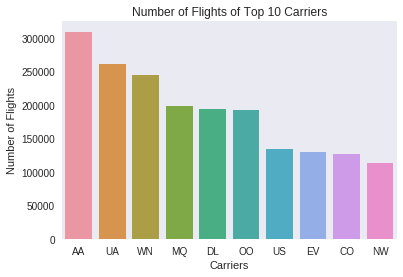

In [15]:
topcar = sns.barplot(x = topdfcar.index, y = topdfcar.Count)
topcar.set(xlabel='Carriers', ylabel='Number of Flights')
topcar.set_title('Number of Flights of Top 10 Carriers at Top 10 Airports');

In [23]:
delay_type_sum =  dftop10[['UniqueCarrier','WeatherDelay', 'ArrDelay', 'DepDelay']].groupby(dftop10.UniqueCarrier).sum().dropna()

flights = dftop10.groupby('UniqueCarrier').count()
flights = flights[flights.index.isin(delay_type_sum.index)]
flights['Number_Flights'] = flights.Year
flights = flights[[ 'Number_Flights']]
flights.dropna(inplace = True)
delay_per_flight = delay_type_sum[['WeatherDelay', 'ArrDelay', 'DepDelay']].div(flights.Number_Flights, axis='index')
delay_per_flight.head()

,WeatherDelay,ArrDelay,DepDelay
UniqueCarrier,,,
9E,0.658053,5.304611,8.123954
AA,0.830340,12.659826,13.992510
AS,0.254608,8.825065,8.807662
B6,0.161244,13.686311,16.071721
CO,0.631441,10.307701,13.102088
